In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from src import metrics  

data = metrics.ladda_data()


### Deskriptiv statistik



In [2]:
stats_result = metrics.grundstatistik(data)
stats_result

,Medel,Median,Min,Max,Standardavvikelse
age,49.43,50.00,18.0,90.0,14.50
weight,74.80,75.00,40.0,133.0,14.76
height,169.82,170.00,140.0,200.0,9.86
systolic_bp,139.47,140.00,100.0,200.0,20.13
cholesterol,4.94,4.95,2.0,8.0,0.98


Tabellen visar centrala mått för variablerna ålder, vikt, längd, systoliskt blodtryck och kolesterolnivå.  
Medelåldern ligger runt 50 år och genomsnittligt systoliskt blodtryck är omkring 140 mmHg.  
Värdena verkar rimliga för en vuxen population.

### Grafer




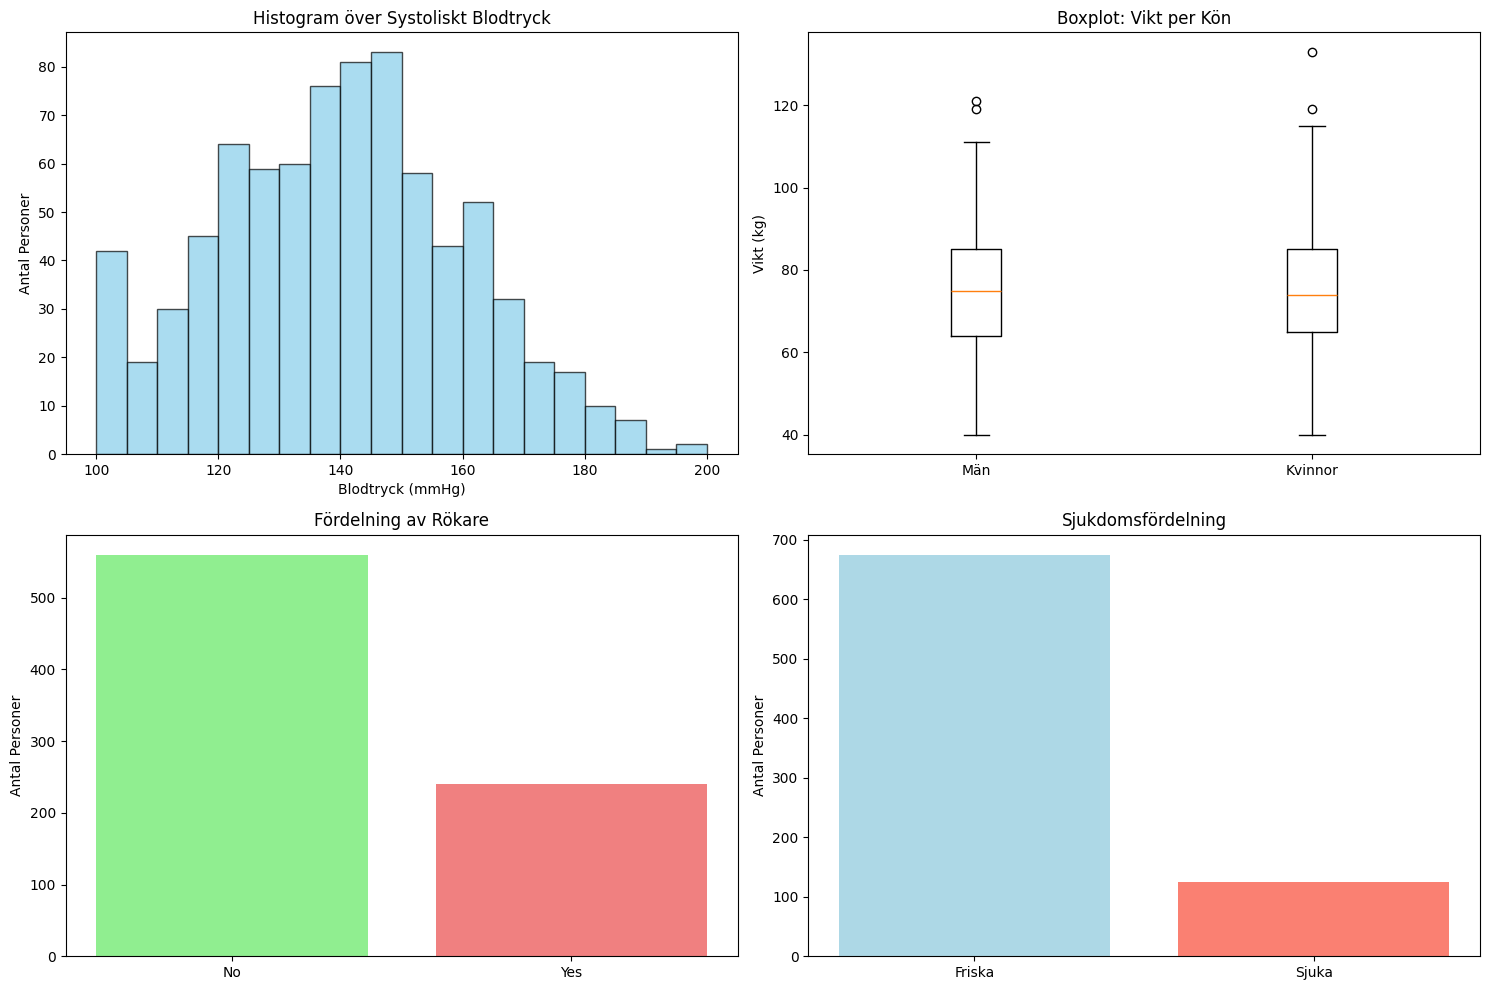

In [3]:
fig = metrics.skapa_grafer(data)
plt.show()

De fyra graferna nedan visar olika aspekter av datasetet:

- Histogrammet över systoliskt blodtryck visar en ungefär normalfördelad spridning med flest personer mellan 120–160 mmHg.  
- Boxploten över vikt visar att män i genomsnitt väger något mer än kvinnor.  
- Stapeldiagrammet över rökare visar att en majoritet i urvalet inte röker.  
- Den sista grafen visar sjukdomsfördelningen, där de flesta är friska men en mindre andel har sjukdomen.

### Simulering



In [4]:
verklig_andel, simulerad_andel, sim_data = metrics.simulera_sjukdom(data)

Verklig andel sjuka: 0.156
Simulerad andel sjuka: 0.157
Skillnad: 0.001


Simuleringen jämför den verkliga andelen sjuka i datasetet med en slumpmässig simulering av 1000 personer med samma sannolikhet för sjukdom.

Resultatet visar att den simulerade andelen ligger mycket nära den verkliga andelen.  
Det betyder att slumpmodellen representerar verkligheten väl, givet den observerade sannolikheten.

### Konfidensintervall



In [ ]:
medel, ci_low, ci_high = metrics.konfidensintervall(data)
print(f"Medelvärde: {medel:.2f} mmHg")
print(f"95% konfidensintervall: ({ci_low:.2f}, {ci_high:.2f})")
metrics.skapa_konfidensintervall_graf(data)

Här beräknas ett 95 % konfidensintervall för medelvärdet av systoliskt blodtryck.

Intervallet visar inom vilket spann det sanna medelvärdet sannolikt ligger.  
Exempelvis: om medelvärdet är 140 mmHg och intervallet (137, 143), betyder det att vi med 95 % säkerhet tror att befolkningens genomsnitt ligger mellan 137 och 143 mmHg.

Grafen visar medelvärdet som en röd streckad linje och konfidensintervallets gränser som orange linjer.

### Hypotesprövning

In [ ]:
rokare_mean, icke_mean, p_value, t_stat = metrics.hypotesprov(data)
metrics.skapa_hypotesgraf(data)

Hypotesen som testas är:

Rökare har lika eller lägre medelblodtryck än icke-rökare.  
Rökare har högre medelblodtryck än icke-rökare.

Resultatet från t-testet visar medelvärdena för båda grupper och ett ensidigt p-värde.  
Om p < 0.05 finns det statistiskt stöd för att rökare har högre blodtryck.  
Om p ≥ 0.05 finns inget signifikant stöd för skillnaden.

Den tillhörande boxploten visar visuellt att rökare tenderar att ha lite högre blodtryck.


### Slutsats

Sammanfattningen av analysen:

- De flesta deltagare har ett normalt systoliskt blodtryck kring 140 mmHg.  
- Simuleringen bekräftar att sannolikheten för sjukdom stämmer överens mellan data och slumpmodellen.  
- Konfidensintervallet ger en rimlig uppskattning av befolkningens genomsnittliga blodtryck.  
- Hypotesprövningen tyder på att rökare har högre blodtryck än icke-rökare (om p < 0.05).  

Dessa resultat stämmer med den medicinska förståelsen att rökning kan påverka blodtrycket negativt.
